# Homework Chapter 2

## Getting test data

In [122]:
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [123]:
laptop_price_file = wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

100% [............................................................................] 298573 / 298573

In [124]:
df = pd.read_csv(laptop_price_file, delimiter=',', header='infer') 
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


## Data Preparation

### Data normalization

In [125]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [126]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Selecting columns

In [127]:
df = df[['ram','storage','screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


## EDA

**Question:** Has the final price a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

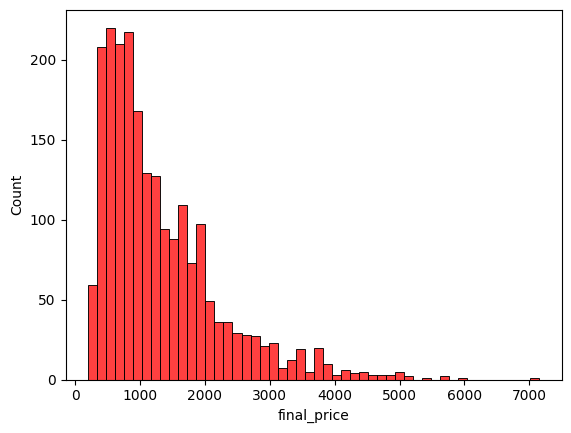

In [128]:
sns.histplot(df.final_price, color='red', bins=50)


<Axes: ylabel='Count'>

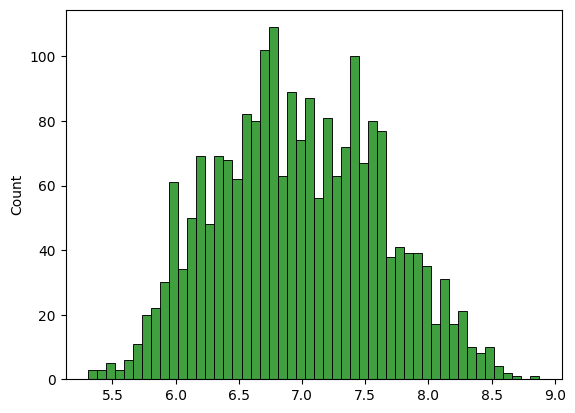

In [129]:
sns.histplot(np.log1p(df.final_price.values), color='green', bins=50)

**Answer:** The final price has a long tail

# Question 1

Missing values ?

In [130]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

What's the median for variable 'ram'?

In [131]:
df.ram.median()

np.float64(16.0)

# Shuffle and split dataset

In [132]:
n = len(df)
n

2160

In [133]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [134]:
n_val, n_test, n_train

(432, 432, 1296)

In [135]:
# shuffle
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [136]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [137]:
#split
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [138]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


# Question 3

Replace NaNs in column screen with 0 , mean or is there no difference?

In [139]:
mean = df_train.screen.mean()
mean

np.float64(15.163534416086618)

In [140]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [141]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [142]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [143]:
len(df_train)

1296

In [144]:
df_train.columns

Index(['ram', 'storage', 'screen'], dtype='object')

In [145]:
base = ['ram', 'storage', 'screen']
def prepare_X(df, newValue):
    df = df.copy()
    features = base
    
    df_num = df[features]
    df_num = df_num.fillna(newValue)
    X = df_num.values

    return X

In [146]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [147]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Test to replace NaN with 0

In [148]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2), score

(np.float64(597.36), np.float64(597.3635593619622))

<Axes: ylabel='Count'>

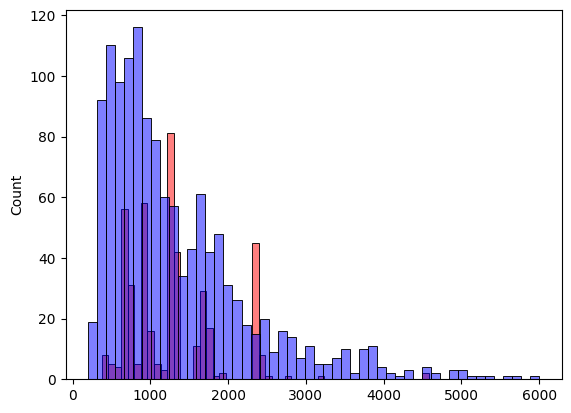

In [149]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Test to replace NaN with mean

In [150]:
X_train = prepare_X(df_train, mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2), score

(np.float64(600.27), np.float64(600.2650313748422))

<Axes: ylabel='Count'>

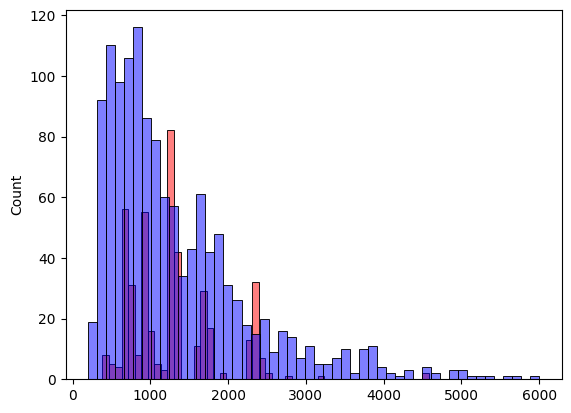

In [151]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

**Answer:** If you replace the NaNs with '0' then the RMSE is lower, so you should use '0'

# Question 4
Train a regularized linear regression. Try different values of r from this list [0, 0.01, 0.1, 1, 5, 10, 100] and replace the NAs with 0. Round the RMSE scores to 2 decimal digits.

**Which r gives the best RMSE?**

In [152]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [153]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 676.8954853003862 597.36
0.01 676.2736817204744 597.36
0.1 670.7284836313235 597.35
1 619.9030834107414 597.21
5 463.7771697142214 597.01
10 352.79713367677243 597.06
100 66.9207144017981 597.9


# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, `use np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)
 
**Question:**

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

>Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [154]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [155]:
def shuffle_index_with_seed(seed):
    n = len(df)
    idx = np.arange(n) # create ordered index with n elements
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    return idx

shuffle_index_with_seed(5)

array([ 945,  424, 1544, ..., 2121, 1424, 1725])

In [156]:
idx = 0

for seed in seed_values:
    idx = shuffle_index_with_seed(seed)
    print (idx)
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, mean)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

[ 175  264 2131 ...  763  835 1653]
[ 986  389   65 ... 1096  235 1061]
[1510 1766  370 ...  674 1099 1608]
[ 679  632  756 ... 1667 1688 1898]
[1089 1023  189 ...  709  174 1146]
[ 945  424 1544 ... 2121 1424 1725]
[2020  263  925 ...  618 2004  227]
[1288  262 2137 ...  537 1220  175]
[ 916 2016  332 ... 2033 1364  451]
[2003  502  896 ...  501  348  382]


In [157]:
np.arange(len(df))
np.random.seed(5)

In [158]:
idx = np.random.shuffle(idx)
idx